In [307]:
import torch
from torch.utils.data import DataLoader # loads data either in chunks or full
from torchvision import datasets # open datasets
from torchvision.transforms import ToTensor # transfor data to tensor
import matplotlib.pyplot as plt

In [308]:
# choosing gpu for training
device = ("cuda:0" if torch.cuda.is_available() else "cpu")
device

'cuda:0'

In [309]:
# download training and test data from open datasets.
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [310]:
# loading the data
train_dataloader = DataLoader(train_data, batch_size=64) # goes over 938 batches of 64
test_dataloader = DataLoader(test_data, batch_size=64)

Name: Shirt, Number: 6


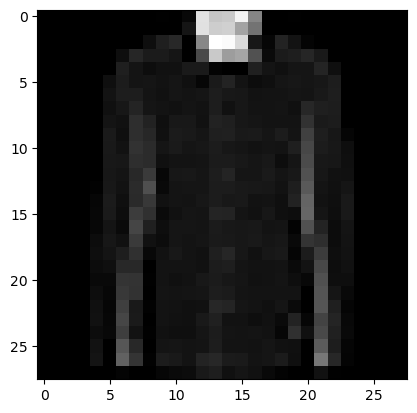

In [311]:
# plotting and understanding images and labels with first batch

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

images, labels = next(iter(train_dataloader))
idx = torch.randint(0, 64, (1,)).item()
image = images[idx].squeeze()
label = labels[idx]
print(f"Name: {labels_map[label.item()]}, Number: {label.item()}")
plt.imshow(image, cmap="grey")
plt.show()

In [312]:
# flattening the image from 2d to 1d
images = images.view(images.size(0), -1)
print(f"Input (images): {images.shape}\t Output (labels): {labels.shape}")


Input (images): torch.Size([64, 784])	 Output (labels): torch.Size([64])


In [313]:
# implementing MLP

class Neuron:
    # nin is number of inputs
    def __init__(self, nin, device):
        self.w = torch.rand(nin, requires_grad=True, device=device) * 2 - 1
        self.b = torch.randn(1, requires_grad=True, device=device)
        print(self.w.shape)
    
    # x is how many inputs
    def __call__(self, x):
        x = torch.as_tensor(x).clone().detach().requires_grad_(True).float() # clone tensor 
        print(x.shape)
        act = torch.matmul(self.w, x) + self.b  # matrix multiplication with compatible shapes
        out = torch.tanh(act)
        return out
    
    def parameters(self):
        return torch.cat([self.w, self.b])
    
class Layer:
    def __init__(self, nin, nout):
        # create nout neurons with nin inputs
        # the amount of neurons is based on how many outputs we need
        self.neurons = [Neuron(nin) for _ in range(nout)]
    
    # x is how many neurons
    def __call__(self, x):
        x = torch.tensor(x) # convert to tensor
        outs = [n(x) for n in self.neurons]
        return outs[0] if len(outs) == 1 else outs
    
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
    # nin is number of inputs
    # nouts is the list of number of outputs/neurons per each layer
    def __init__(self, nin, nouts):
        sz = [nin] + nouts
        self.layers = [Layer(sz[i], sz[i + 1]) for i in range(len(nouts))]
    
    # bruh this is forward propagation?? weird
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    

In [314]:
# implementing neuron
neuron = Neuron(784, device)
random_tensor = torch.randn(784, dtype=torch.float32, device=device)
neuron(random_tensor)

torch.Size([784])
torch.Size([784])


tensor([0.9999], device='cuda:0', grad_fn=<TanhBackward0>)

In [315]:
i = 0
for batch, (x, y) in enumerate(train_dataloader):
    x = x.view(x.size(0), -1)

    x, y = x.to(device), y.to(device)

    for img in x:
        # img.to(device)
        print(img.shape)
        neuron(img)

torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size([784])
torch.Size